<a href="https://colab.research.google.com/github/Sharrfaa/textsummariser/blob/main/IBP_Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget -O enron.db https://curtin-my.sharepoint.com/:u:/g/personal/211934g_curtin_edu_au/EaYagsqa2r1Bi5wtHbswGFwBH2kd2uTnz6rlka7GI36GUQ?download=1

--2023-05-25 09:57:21--  https://curtin-my.sharepoint.com/:u:/g/personal/211934g_curtin_edu_au/EaYagsqa2r1Bi5wtHbswGFwBH2kd2uTnz6rlka7GI36GUQ?download=1
Resolving curtin-my.sharepoint.com (curtin-my.sharepoint.com)... 13.107.136.8, 13.107.138.8, 2620:1ec:8f8::8, ...
Connecting to curtin-my.sharepoint.com (curtin-my.sharepoint.com)|13.107.136.8|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /personal/211934g_curtin_edu_au/Documents/Teaching/ISYS2001/ISYS2001-Assignment-2-Data/enron_sqlite3.db?ga=1 [following]
--2023-05-25 09:57:22--  https://curtin-my.sharepoint.com/personal/211934g_curtin_edu_au/Documents/Teaching/ISYS2001/ISYS2001-Assignment-2-Data/enron_sqlite3.db?ga=1
Reusing existing connection to curtin-my.sharepoint.com:443.
HTTP request sent, awaiting response... 200 OK
Length: 853819392 (814M) [application/octet-stream]
Saving to: ‘enron.db’

enron.db            100%[===================>] 814.27M  19.2MB/s    in 41s     

2023-05-25 09:58:04 (19.

In [2]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
conn = sqlite3.connect("enron.db")

In [4]:
cur = conn.cursor()

In [5]:
sql = """
SELECT name
FROM sqlite_master
WHERE type = 'table';
"""

cur.execute(sql)
cur.fetchall()

[('employeelist',), ('message',), ('recipientinfo',), ('referenceinfo',)]

In [6]:
table_df = pd.read_sql_query(sql,conn)
table_df

,name
0,employeelist
1,message
2,recipientinfo
3,referenceinfo


In [7]:
sql2 ="""
PRAGMA table_info('employeelist');
"""

cur.execute(sql2)
cur.fetchall()

[(0, 'eid', 'INTEGER', 1, None, 1),
 (1, 'firstName', 'VARCHAR(31)', 1, "''", 0),
 (2, 'lastName', 'VARCHAR(31)', 1, "''", 0),
 (3, 'Email_id', 'VARCHAR(31)', 1, "''", 0),
 (4, 'Email2', 'VARCHAR(31)', 0, None, 0),
 (5, 'Email3', 'VARCHAR(31)', 0, None, 0),
 (6, 'EMail4', 'VARCHAR(31)', 0, None, 0),
 (7, 'folder', 'VARCHAR(31)', 1, "''", 0),
 (8, 'status', 'VARCHAR(50)', 0, None, 0)]

In [8]:
table_df = pd.read_sql_query(sql2,conn)
table_df

,cid,name,type,notnull,dflt_value,pk
0,0,eid,INTEGER,1,None,1
1,1,firstName,VARCHAR(31),1,'',0
2,2,lastName,VARCHAR(31),1,'',0
3,3,Email_id,VARCHAR(31),1,'',0
4,4,Email2,VARCHAR(31),0,None,0
5,5,Email3,VARCHAR(31),0,None,0
6,6,EMail4,VARCHAR(31),0,None,0
7,7,folder,VARCHAR(31),1,'',0
8,8,status,VARCHAR(50),0,None,0


In [9]:
#sql3 ="""
#SELECT lastName, Email_id, Email2 FROM Employeelist;
#"""

#cur.execute(sql3)
#cur.fetchall()

In [10]:
#table_df = pd.read_sql_query(sql3,conn)
#table_df

In [ ]:
sql4 ="""
PRAGMA table_info('message');
"""

cur.execute(sql4)
cur.fetchall()

In [12]:
#table_df = pd.read_sql_query(sql4,conn)
#table_df

In [13]:
#sql5 = """
#SELECT * FROM message;
#"""

#cur.execute(sql5)
#cur.fetchall()

In [14]:
#table_df = pd.read_sql_query(sql5,conn)
#table_df

In [15]:
sql6 ="""
PRAGMA table_info('recipientinfo');
"""

cur.execute(sql6)
cur.fetchall()

[(0, 'rid', 'INTEGER', 1, "'0'", 1),
 (1, 'mid', 'INTEGER', 1, "'0'", 0),
 (2, 'rtype', 'TEXT', 0, None, 0),
 (3, 'rvalue', 'VARCHAR(127)', 0, None, 0),
 (4, 'dater', 'DATETIME', 0, None, 0)]

In [16]:
#table_df = pd.read_sql_query(sql6,conn)
#table_df

In [17]:
#sql7 = """
#SELECT * FROM Recipientinfo;
#"""

#cur.execute(sql7)
#cur.fetchall()

In [18]:
#table_df = pd.read_sql_query(sql7,conn)
#table_df

In [20]:
sql8 ="""
PRAGMA table_info('referenceinfo');
"""

cur.execute(sql8)
cur.fetchall()

[(0, 'rfid', 'INTEGER', 1, "'0'", 1),
 (1, 'mid', 'INTEGER', 1, "'0'", 0),
 (2, 'reference', 'TEXT', 0, None, 0)]

In [21]:
#table_df = pd.read_sql_query(sql8,conn)
#table_df

In [22]:
#sql9 = """
#SELECT * FROM Referenceinfo;
#"""

#cur.execute(sql9)
#cur.fetchall()

In [23]:
#table_df = pd.read_sql_query(sql9,conn)
#table_df

In [24]:
SQL = """
SELECT date FROM message
"""

message_df = pd.read_sql_query(SQL, conn)
message_df

,date
0,2000-01-21 04:51:00
1,2000-01-24 01:37:00
2,2000-01-24 02:06:00
3,2000-02-02 10:21:00
4,2000-02-07 22:16:00
...,...
252754,2002-02-06 16:51:29
252755,2002-02-06 17:17:39
252756,2002-02-06 20:09:37
252757,2002-02-07 04:38:13


In [25]:
# count number of email per day using sql query
SQL = """
SELECT strftime('%Y-%M-5d',date)
AS date,
COUNT(*) AS count FROM message
GROUP BY date
"""

cur.execute(SQL)

# convert to df
messageperday_df = pd.read_sql_query(SQL, conn)
messageperday_df

,date,count
0,0001-10-5d,2
1,0001-40-5d,1
2,0001-11-5d,1
3,0001-30-5d,1
4,0001-06-5d,1
...,...,...
194082,2020-53-5d,1
194083,2043-34-5d,1
194084,2044-46-5d,1
194085,2044-59-5d,1


<Axes: xlabel='date', ylabel='count'>

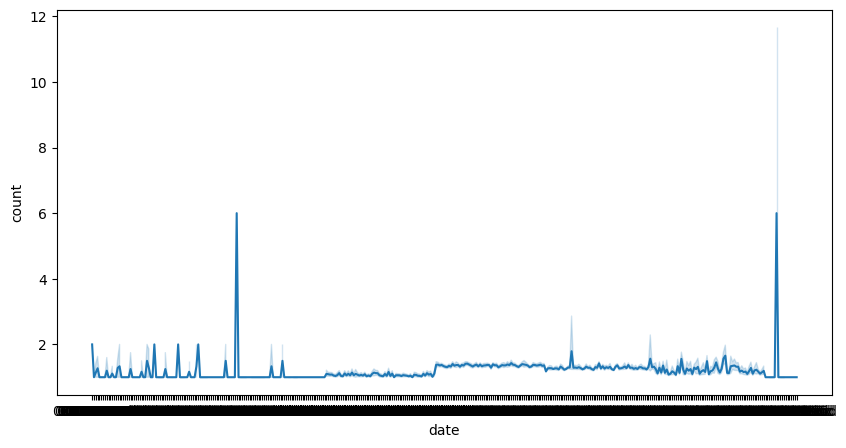

In [26]:
fig = plt.subplots(figsize=(10,5))
sns.lineplot(x="date", y="count" ,data= messageperday_df)

In [37]:
# count number of email per week using sql query
SQL = """
SELECT strftime('%Y-%M-%w',date)
AS date,
COUNT(*) AS email FROM message
GROUP BY date
"""

cur.execute(SQL)

# convert to df
messageperweek_df = pd.read_sql_query(SQL, conn)
messageperweek_df

,date,email
0,0001-10-3,2
1,0001-40-1,1
2,0001-11-2,1
3,0001-30-3,1
4,0001-06-1,1
...,...,...
194082,2020-53-2,1
194083,2043-34-1,1
194084,2044-46-6,1
194085,2044-59-1,1


<Axes: xlabel='date', ylabel='email'>

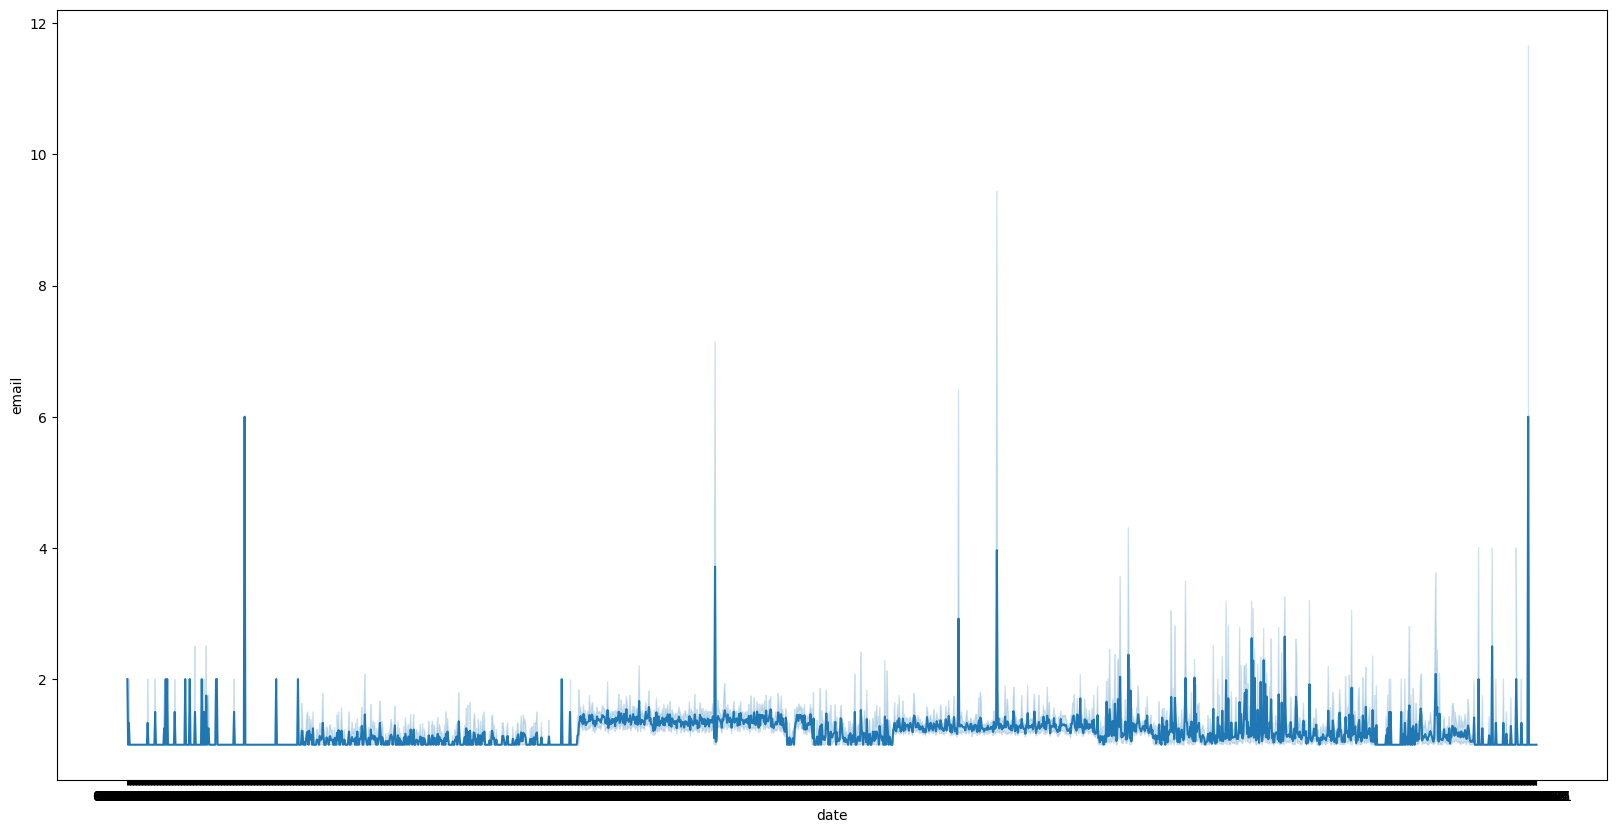

In [38]:
fig = plt.subplots(figsize=(20,10))
sns.lineplot(x="date", y="email" ,data= messageperweek_df)

In [39]:
# count number of email per month using sql query
SQL = """
SELECT strftime('%Y-%m',date)
AS date,
COUNT(*) AS email_count FROM message
GROUP BY date
"""

cur.execute(SQL)

# convert to df
messagepermonth_df = pd.read_sql_query(SQL, conn)
messagepermonth_df

,date,email_count
0,0001-05,2
1,0001-06,1
2,0001-07,1
3,0001-08,1
4,0001-08,1
...,...,...
194082,2020-12,1
194083,2043-12,1
194084,2044-01,1
194085,2044-01,1


<Axes: xlabel='date', ylabel='email_count'>

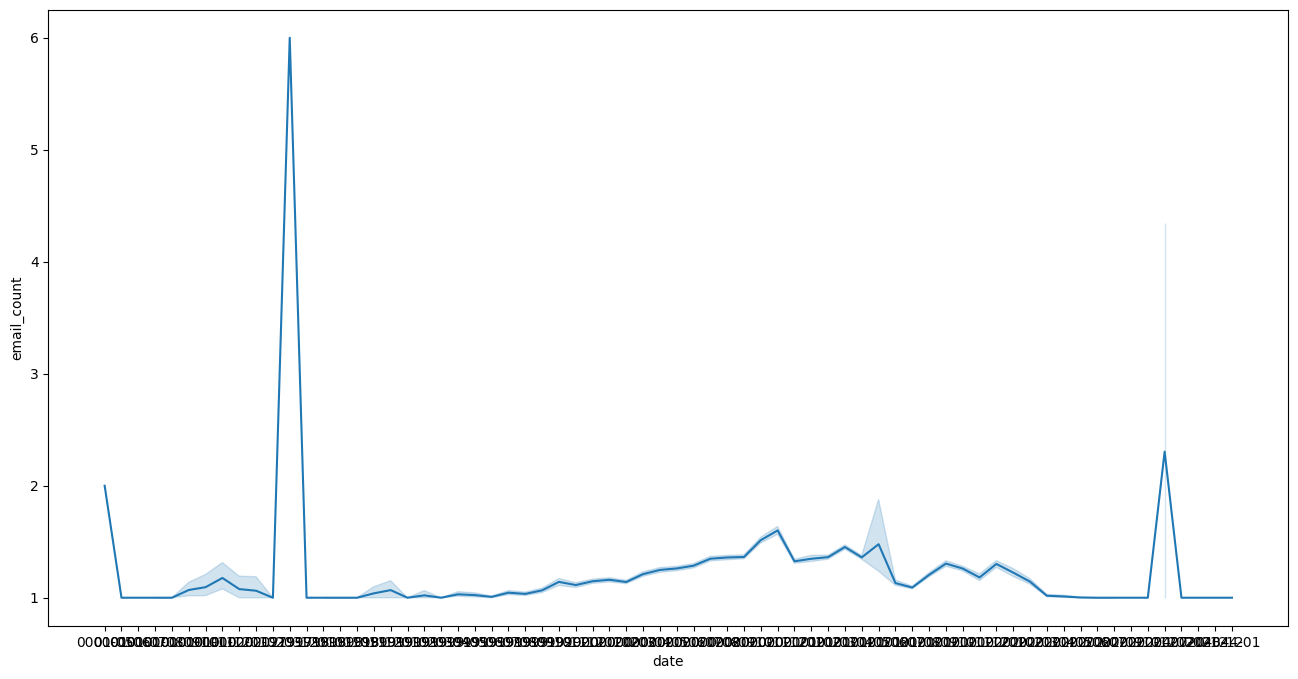

In [42]:
fig = plt.subplots(figsize=(16,8))
sns.lineplot(x="date", y="email_count" ,data= messagepermonth_df)

In [ ]:
sender_query = """
SELECT sender, COUNT(*) AS sender_email_count
FROM(
  SELECT sender
  FROM Message m
  )
GROUP BY sender
ORDER BY sender_email_count DESC
LIMIT 10
;
"""
sender_df = pd.read_sql_query(sender_query,conn)
sender_df

,sender,sender_email_count
0,jeff.dasovich@enron.com,6273
1,j.kaminski@enron.com,5838
2,kay.mann@enron.com,5100
3,sara.shackleton@enron.com,4797
4,tana.jones@enron.com,4437
5,chris.germany@enron.com,3686
6,no.address@enron.com,3511
7,enron.announcements@enron.com,2838
8,matthew.lenhart@enron.com,2784
9,debra.perlingiere@enron.com,2549


<Axes: xlabel='sender_email_count', ylabel='sender'>

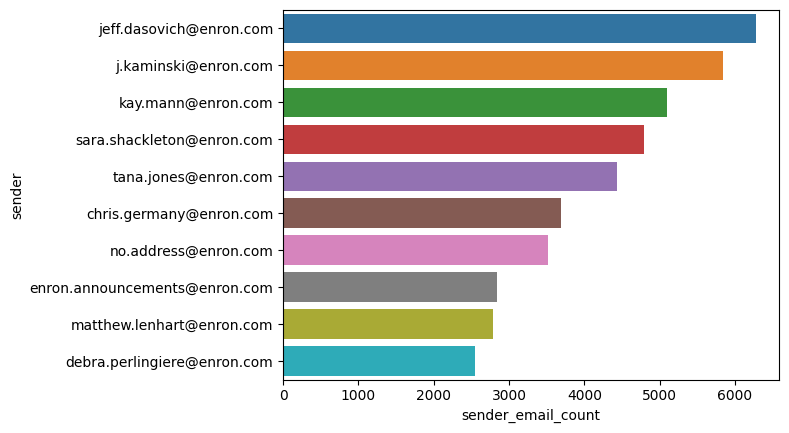

In [ ]:
data = sender_df
sns.barplot(data=data, y='sender', x='sender_email_count')

In [54]:
sql = """
SELECT rvalue as recipient_email, COUNT(*) AS recipient_email_count FROM Recipientinfo
GROUP BY recipient_email
ORDER BY recipient_email_count DESC
LIMIT 10;
"""

recipient_df = pd.read_sql(sql,conn)
recipient_df

,recipient_email,recipient_email_count
0,no.address@enron.com,19198
1,jeff.dasovich@enron.com,11137
2,richard.shapiro@enron.com,11015
3,steven.j.kean@enron.com,10873
4,james.d.steffes@enron.com,10615
5,tana.jones@enron.com,9781
6,sara.shackleton@enron.com,9633
7,mark.e.taylor@enron.com,9090
8,louise.kitchen@enron.com,7603
9,pete.davis@enron.com,7509


<Axes: xlabel='recipient_email_count', ylabel='recipient_email'>

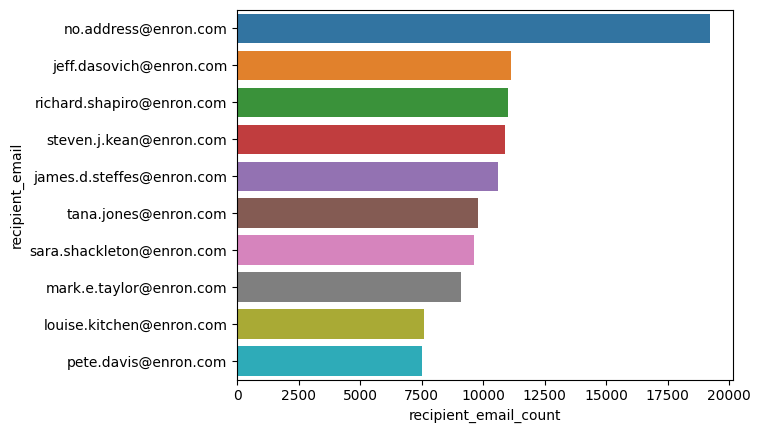

In [57]:
data = recipient_df
sns.barplot(data=recipient_df, y='recipient_email', x='recipient_email_count')

In [ ]:
#conn.commit()
#conn.close()